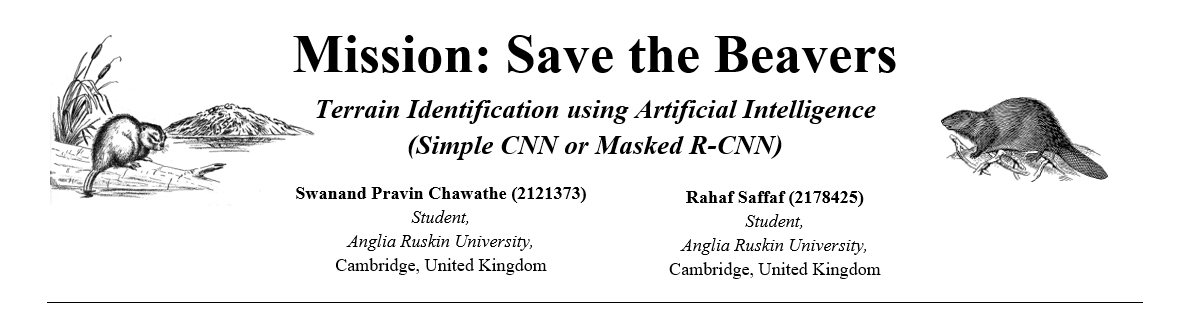

### EXPERIMENT III - part B
(Instance Segmentation using Mask R-CNN) - Multiple Label/Anotation

**Summary:** As the outcome of Experiment III part A looked promisin with a single Label, we continued our experiments with the most advance version of Mask R CNN that can perform instance segmentation.

**Approach**
We used the method of Transfer Learning and a solution inline and ontop of the Mask-RCNN. The approach was exactly in line with the Experiment III, however we needed further tweaking the code to make it compatible with multi class. Durther we had to perform the tedious task of Annotation of images using the MakeSense. Rest all steps remain same.

**Data Annotation:**
Using an Open Source free tool named MakeSense, we  managed to label 103 images, sample as below. The tool provided an option to export a json which contained annotation. As there was no presence of Image on the cloud, we had to manually upload the original images when running the model. We created 4 classes Water, Vegetation, Beaver Dam, Beaver Lodge for this experiment.

The train/test was split on the go in the code.

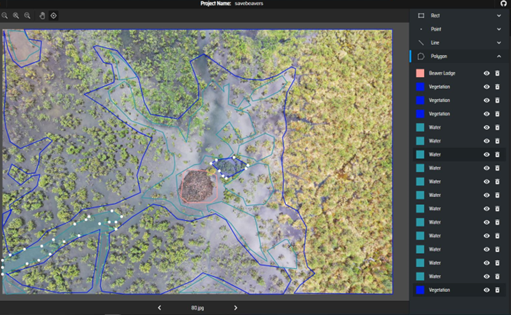


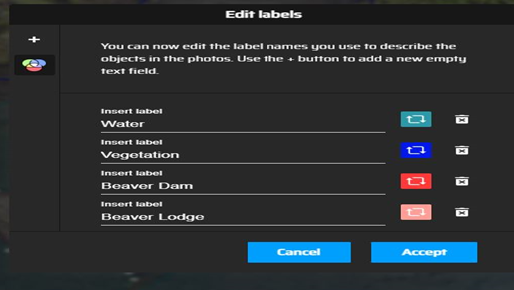

**Reference:**

Canu, S. (2021). Instance Segmentation MASK R-CNN | with Python and Opencv. [online] Pysource. Available at: https://pysource.com/2021/05/18/instance-segmentation-mask-r-cnn-with-python-and-opencv/ [Accessed 12 Apr. 2023]



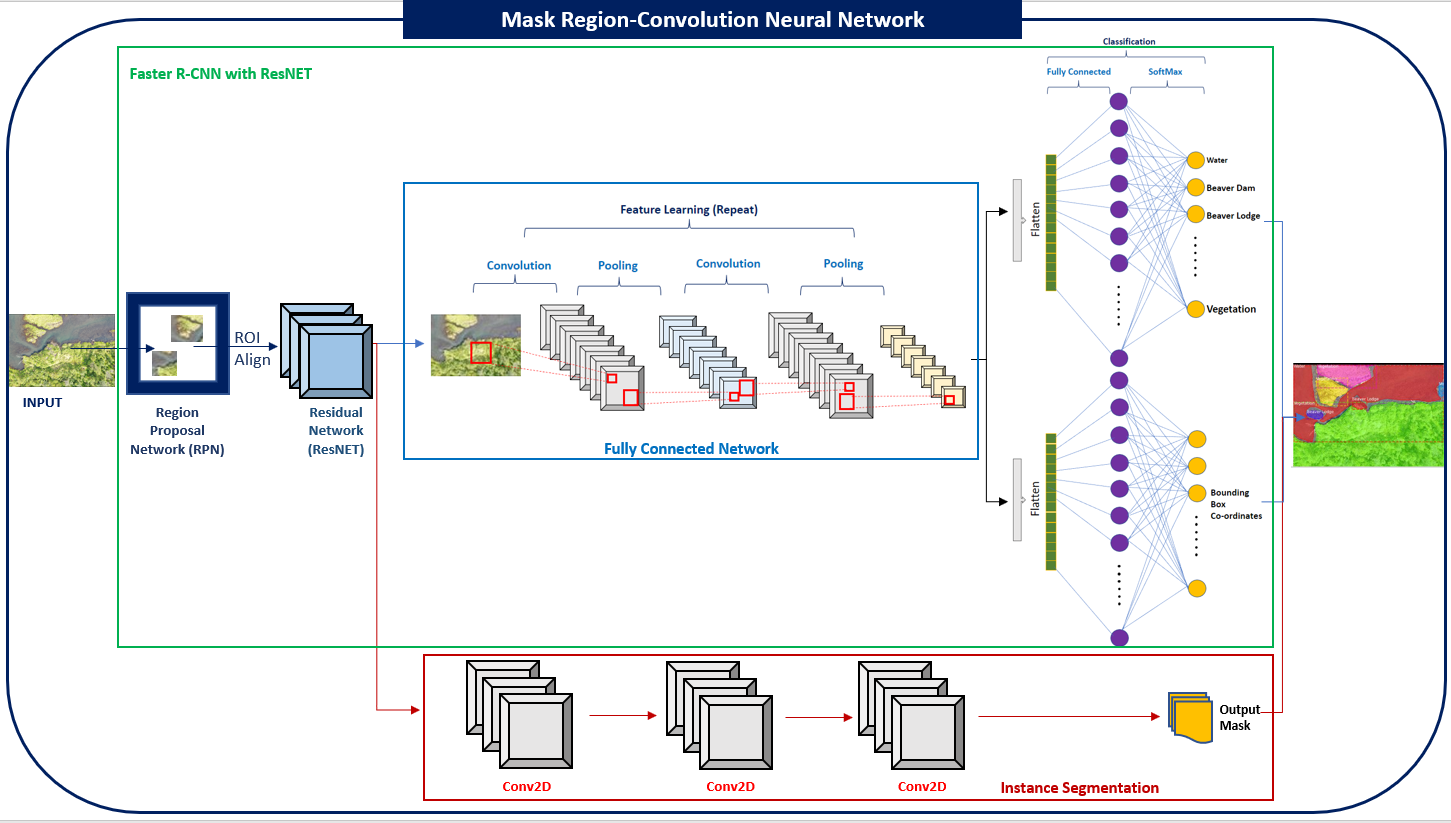

## **1. Installation**

Installing Tensorflow 2.5 and matching CUDA on Google Collaboratory, this would help the code run on GPU and help us work on image processing for Mask R-CNN

In [1]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-04-16 17:52:26--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   163MB/s    in 2.5s    

2023-04-16 17:52:29 (163 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.7.0.84-1+cuda11.8) ...
Setting up libcudnn8 (8.1.0.77-1+c

**Loading the Mask-RCNN**

Using Transfer Learning and trying to reuse the concept, we will be using the Mask R-CNN which was built with famous COCO data set as the base.

In below step we Install Mask R-CNN

In [2]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2023-04-16 17:54:41--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K  --.-KB/s    in 0.1s    

2023-04-16 17:54:42 (574 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py  
VERS 0.5 - updated 11/03/2023


/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [3]:
# From the lessons learnt: the most difficult task is to get a GPU on Collaboratory and to make the code run on the GPU, the below 
# helps us check the type of GPU we are allocated by Google.
!nvidia-smi

Sun Apr 16 17:54:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import tensorflow as tf
tf.__version__

'2.5.0'

## **2. Image Dataset**

Load Beaver Habitat annotated dataset and Beaver images


**Pre-requisite:** 

>* "labels_savebeavers_2023-04-06-01-17-46.json" is a file exported from MakeSense which creates 103 images  along with the 4 Annotaitions
This file has to be manually uploaded under the "content" folder on Collab

>* The 103 original images are to be used and are to be uploaded under the "InpDataset" folder that is created in the below line. A train.zip folder will contain the images that are to be used.


In [5]:
# Extract annotations

annotations_path = "labels_savebeavers_2023-04-06-01-17-46.json"
os.makedirs("InpDataset")


#extract_images(os.path.join("/content/",images_path), "/content/dataset")

**Read the Annotation and virtually split in test and train**

In [10]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/InpDataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/InpDataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/labels_savebeavers_2023-04-06-01-17-46.json
Annotation json path:  /content/labels_savebeavers_2023-04-06-01-17-46.json
Train: 92
Validation: 11
Classes: 4


**Check Successful loading of Annotation and Image in the dataframe "dataset_train"**

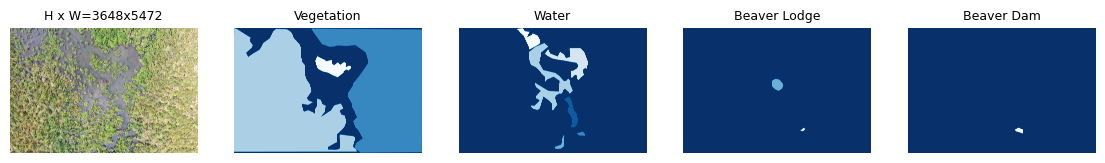

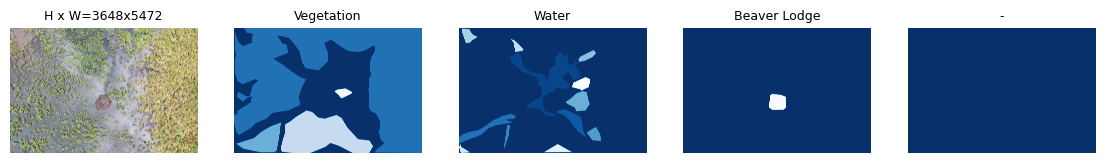

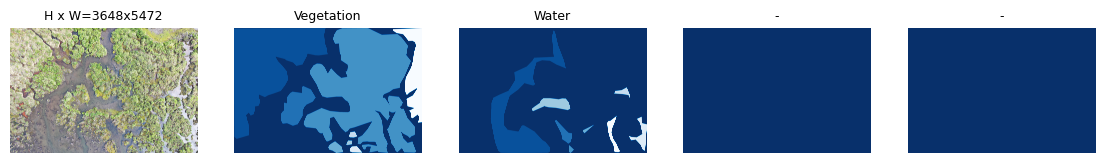

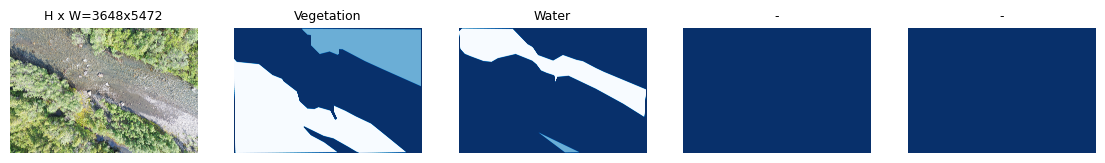

In [13]:
# Load image samples
display_image_samples(dataset_train)

## **3. Training**

Train Mask RCNN on your Train Dataset.
The famous coco data set is used to pretrain the model/pre load the model and is further trained using the Beaver Dataset

In [17]:
#Hyper parameter tuning

class TerrainConfing(Config):
    NAME = "object"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 4 # as we have 4 class plus one background

    IMAGE_MIN_DIM = 512 
    IMAGE_MAX_DIM = 512

    STEPS_PER_EPOCH = 500 #236

    VALIDATION_STEPS = 10
    ETF_C = 5
    DETECTION_MIN_CONFIDENCE = 0.9
    use_multiprocessing=True

config = TerrainConfing()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
ETF_C                          5
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE          

In [18]:
# loading the pretrained mask rcnn COCO weights with the new config
model = load_training_model(config)

/content/maskrcnn_colab/mask_rcnn_coco.h5


In [19]:
# Start Training
# This operation might take a long time. We use 500 steps per EPOCH and 5 EPOCH
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230416T1809/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model


In [20]:
class InfConfing():
    BACKBONE = "resnet101"
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]
    BATCH_SIZE=1
    BBOX_STD_DEV=[0.1, 0.1, 0.2, 0.2]
    COMPUTE_BACKBONE_SHAPE=None
    DETECTION_MAX_INSTANCES=100
    DETECTION_MIN_CONFIDENCE=0.9
    DETECTION_NMS_THRESHOLD=0.3
    ETF_C=5
    FPN_CLASSIF_FC_LAYERS_SIZE=1024
    GPU_COUNT=1
    GRADIENT_CLIP_NORM=5.0
    IMAGES_PER_GPU=1
    IMAGE_CHANNEL_COUNT=3
    IMAGE_MAX_DIM=512
    IMAGE_META_SIZE=17
    IMAGE_MIN_DIM=512
    IMAGE_MIN_SCALE=0
    IMAGE_RESIZE_MODE="square"
    IMAGE_SHAPE=[512 ,512 ,  3]
    LEARNING_MOMENTUM=0.9
    LEARNING_RATE=0.001
    LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
    MASK_POOL_SIZE=14
    MASK_SHAPE=[28, 28]
    MAX_GT_INSTANCES=100
    MEAN_PIXEL=[123.7, 116.8 ,103.9]
    MINI_MASK_SHAPE=(56, 56)
    NAME="object"
    NUM_CLASSES=5
    POOL_SIZE=7
    POST_NMS_ROIS_INFERENCE=1000
    POST_NMS_ROIS_TRAINING=2000
    PRE_NMS_LIMIT=6000
    ROI_POSITIVE_RATIO=0.33
    RPN_ANCHOR_RATIOS=[0.5, 1, 2]
    RPN_ANCHOR_SCALES=(32, 64, 128, 256, 512)
    RPN_ANCHOR_STRIDE=1
    RPN_BBOX_STD_DEV=[0.1, 0.1, 0.2, 0.2]
    RPN_NMS_THRESHOLD=0.7
    RPN_TRAIN_ANCHORS_PER_IMAGE=256
    STEPS_PER_EPOCH=250
    TOP_DOWN_PYRAMID_SIZE=256
    TRAIN_BN=False
    TRAIN_ROIS_PER_IMAGE=200
    USE_MINI_MASK=True
    USE_RPN_ROIS=True
    VALIDATION_STEPS=10
    WEIGHT_DECAY=0.0001
    use_multiprocessing=True

In [70]:
inference_config=InfConfing()
MODEL_DIR="/content/maskrcnn_colab/logs/object20230416T1809/mask_rcnn_object_0004.h5"

In [71]:
test_model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=MODEL_DIR)

**Outcome**

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


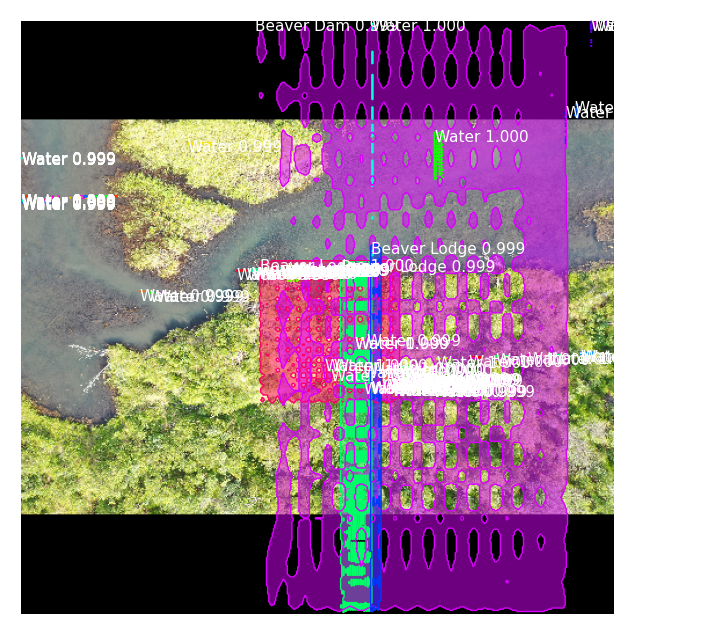

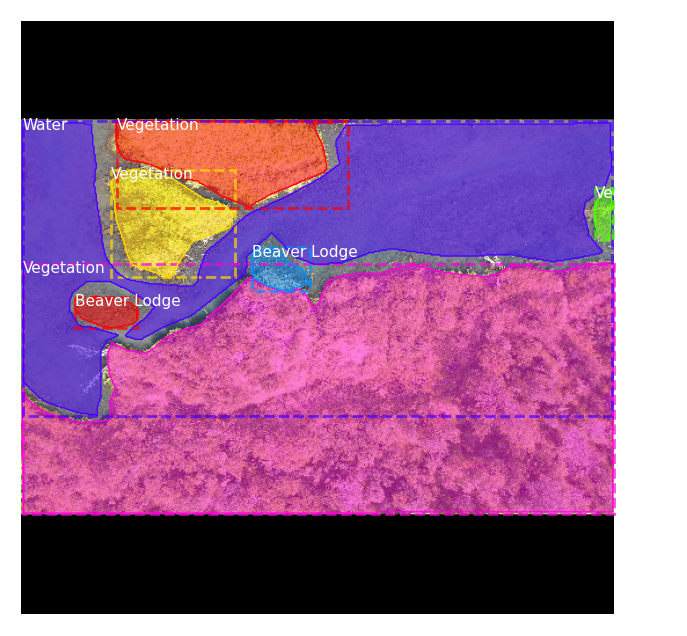

In [72]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

**Observation:**
>* We did manage to execute the model for the Experiment III part B 
>* The output imags signlify that the accuracy of the model is very low at moment, that is evident as the losses when training are significant.
>* It is evident that the model took almost 1.5 hrs to train, yet lacked accuracy. To achieve reasonable efforts, we need machines with higher computation capabilities.
>* We can definitely look for this approach as the output does show the masks and multiple instances, with fine tuning and better training, if we are able to achive the desirder outcome as shown in the above image, this Model could be best suited for our Mission to Save Beavers.
    
    
**Take Away**    
>* Mask R-CNN Instance Segmentation works wonders when we are working to identify objects or specific subjects in our case Beaver presence.
>* They have an advantage over the Semantic Segmentation, it identifies multiple instances of same class in a particular image.
>* The code took a whooping 1.5 hours just for 103 images as input and four label. with GPU hitting the red line throughout, demanding high computation powers.
>* The losses were very high making it evidnent that the model needed tuning on large number of EPOCHS.


**Way Ahead**
>* Having Making the a multi class Mask RCNN model work for our Mission to save Beavers we shall hault for now as we did manage to prove 3 different approaches building 4 different models, and all enabling us achieve our Mission to Save the Bavers.